In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
rc('font', family = 'AppleGothic')


import os
from glob import glob
import json
import warnings

from tqdm import tqdm_notebook
import googlemaps
import folium

from selenium import webdriver
from bs4 import BeautifulSoup
import time
from multiprocessing import pool

In [2]:
population = pd.read_excel('../data/05. population_raw_data.xlsx', header=1)
population

,행정구역(동읍면)별(1),행정구역(동읍면)별(2),항목,계,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,NaN,NaN,여자인구수 (명),5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,NaN,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,NaN,NaN,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,NaN,NaN,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,NaN,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [3]:
population.rename(columns={'행정구역(동읍면)별(1)':'광역시도', "행정구역(동읍면)별(2)":"시도", '계':"인구수"}, inplace=True)

In [4]:
population.rename(columns={'항목':'구분'}, inplace=True)

In [5]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,NaN,NaN,여자인구수 (명),5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,NaN,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,NaN,NaN,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,NaN,NaN,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,NaN,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [6]:
population[population['구분'] == '남자인구수 (명)'] 

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
1,NaN,NaN,남자인구수 (명),25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
4,NaN,NaN,남자인구수 (명),4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
7,NaN,NaN,남자인구수 (명),75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
10,NaN,NaN,남자인구수 (명),62204.0,4142.0,4792.0,5192,5221.0,3113.0,2405.0,1752,929.0,414.0,132.0,56,51.0
13,NaN,NaN,남자인구수 (명),111601.0,6937.0,8373.0,9455,9434.0,4834.0,3975.0,3094,1739.0,750.0,284.0,102,88.0
16,NaN,NaN,남자인구수 (명),148326.0,10609.0,11848.0,12692,13154.0,6090.0,4863.0,3480,1698.0,580.0,184.0,56,54.0
19,NaN,NaN,남자인구수 (명),174797.0,13317.0,15555.0,16034,14875.0,6775.0,5376.0,3693,1609.0,631.0,170.0,54,37.0
22,NaN,NaN,남자인구수 (명),177640.0,13162.0,14859.0,14140,14489.0,8237.0,6815.0,4950,2375.0,801.0,248.0,87,68.0
25,NaN,NaN,남자인구수 (명),204900.0,14676.0,14784.0,16607,17248.0,9448.0,7189.0,4879,2214.0,667.0,211.0,57,37.0
28,NaN,NaN,남자인구수 (명),219951.0,15761.0,16229.0,16075,17424.0,9402.0,7979.0,5825,2856.0,978.0,287.0,87,78.0


In [7]:
population.loc[population['구분'] == '남자인구수 (명)', '구분'] = '남자'

In [8]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자,25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자인구수 (명),25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자,4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,NaN,NaN,여자인구수 (명),5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,NaN,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,NaN,NaN,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,NaN,NaN,여자인구수 (명),77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,NaN,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [9]:
population.loc[population['구분'] == '여자인구수 (명)', '구분'] = '여자'

In [10]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구수 (명),51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자,25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자,25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구수 (명),9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자,4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,NaN,NaN,여자,5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,NaN,종로구,총인구수 (명),152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,NaN,NaN,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,NaN,NaN,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,NaN,중구,총인구수 (명),125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [11]:
# 총인구수 (명)

population.loc[population['구분'] == '총인구수 (명)', '구분'] = '총인구'

In [12]:
population

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,전국,소계,총인구,51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0
1,NaN,NaN,남자,25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0
2,NaN,NaN,여자,25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0
3,서울특별시,소계,총인구,9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0
4,NaN,NaN,남자,4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0
5,NaN,NaN,여자,5053827.0,343194.0,379724.0,401149,407391.0,237388.0,186814.0,139885,87616.0,46472.0,18007.0,5158,4069.0
6,NaN,종로구,총인구,152737.0,11379.0,11891.0,10684,10379.0,7411.0,6636.0,5263,3104.0,1480.0,602.0,234,220.0
7,NaN,NaN,남자,75201.0,5620.0,6181.0,5387,5034.0,3411.0,3009.0,2311,1289.0,506.0,207.0,89,73.0
8,NaN,NaN,여자,77536.0,5759.0,5710.0,5297,5345.0,4000.0,3627.0,2952,1815.0,974.0,395.0,145,147.0
9,NaN,중구,총인구,125249.0,8216.0,9529.0,10332,10107.0,6399.0,5313.0,4127,2502.0,1260.0,469.0,158,160.0


In [13]:
population.fillna(method='pad', inplace=True)

In [14]:
population['20 - 39세'] = population.loc[:,'20 - 24세':'35 - 39세'].apply(lambda x:x.sum(), axis = 1)

In [15]:
population.head()

,광역시도,시도,구분,인구수,20 - 24세,25 - 29세,30 - 34세,35 - 39세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+,20 - 39세
0,전국,소계,총인구,51696216.0,3541061.0,3217367.0,3517868,4016272.0,2237345.0,1781229.0,1457890,909130.0,416164.0,141488.0,34844,17562.0,14292568.0
1,전국,소계,남자,25827594.0,1877127.0,1682988.0,1806754,2045265.0,1072395.0,806680.0,600607,319391.0,113221.0,32695.0,7658,4137.0,7412134.0
2,전국,소계,여자,25868622.0,1663934.0,1534379.0,1711114,1971007.0,1164950.0,974549.0,857283,589739.0,302943.0,108793.0,27186,13425.0,6880434.0
3,서울특별시,소계,총인구,9930616.0,690728.0,751973.0,803507,817467.0,448956.0,350580.0,251961,141649.0,66067.0,24153.0,7058,5475.0,3063675.0
4,서울특별시,소계,남자,4876789.0,347534.0,372249.0,402358,410076.0,211568.0,163766.0,112076,54033.0,19595.0,6146.0,1900,1406.0,1532217.0


In [16]:
population['노인'] = population.loc[:,"65 - 69세":"100+"].apply(lambda x: x.sum(), axis = 1)

In [17]:
population = population[population['시도'] != '소계']

In [18]:
pop_pivot = pd.pivot_table(population,index=['광역시도', '시도'],columns=['구분'], values=['인구수','20 - 39세', '노인'])
pop_pivot.to_csv("../data/test1.csv")
pop_pivot

20 - 39세                           노인                          인구수  \
구분               남자        여자       총인구       남자       여자       총인구        남자   
광역시도 시도                                                                         
강원도  강릉시    26286.0   23098.0   49384.0  15767.0  21912.0   37679.0  106231.0   
     고성군     4494.0    2529.0    7023.0   2900.0   4251.0    7151.0   15899.0   
     동해시    11511.0    9753.0   21264.0   6392.0   8732.0   15124.0   47166.0   
     삼척시     8708.0    7115.0   15823.0   5892.0   8718.0   14610.0   35253.0   
     속초시     9956.0    8752.0   18708.0   5139.0   7613.0   12752.0   40288.0   
     양구군     4368.0    2481.0    6849.0   1650.0   2458.0    4108.0   12918.0   
     양양군     2916.0    2171.0    5087.0   2988.0   3993.0    6981.0   13838.0   
     영월군     4025.0    3134.0    7159.0   4215.0   5700.0    9915.0   20652.0   
     원주시    45755.0   43164.0   88919.0  17384.0  24862.0   42246.0  167854.0   
     인제군     5512.0    3449.0    8961.0   2413.0   3189.0    5602.0   17677.0   
     정선군     4138.0    3297.0    7435.0   3831.0   5177.0    9008.0   19975.0   
     철원군     7918.0    4714.0   12632.0   3804.0   5308.0    9112.0   25429.0   
     춘천시    37173.0   35422.0   72595.0  17259.0  24440.0   41699.0  138251.0   
     태백시     5333.0    4643.0    9976.0   3978.0   5288.0    9266.0   23899.0   
     평창군     4377.0    3585.0    7962.0   4223.0   5614.0    9837.0   22126.0   
     홍천군     7900.0    6258.0   14158.0   6450.0   8483.0   14933.0   35738.0   
     화천군     5397.0    2643.0    8040.0   1991.0   2815.0    4806.0   14554.0   
     횡성군     4512.0    3789.0    8301.0   4941.0   6382.0   11323.0   23398.0   
경기도  가평군     7024.0    5771.0   12795.0   5960.0   7609.0   13569.0   31981.0   
     고양시   143723.0  145020.0  288743.0  46866.0  67226.0  114092.0  510923.0   
     과천시     8582.0    8315.0   16897.0   3117.0   4618.0    7735.0   31013.0   
     광명시    49509.0   47807.0   97316.0  15468.0  21081.0   36549.0  168241.0   
     광주시    49690.0   45073.0   94763.0  16061.0  19142.0   35203.0  168345.0   
     구리시    27732.0   26941.0   54673.0   8903.0  11720.0   20623.0   96397.0   
     군포시    43183.0   41049.0   84232.0  12126.0  16404.0   28530.0  141647.0   
     권선구    60291.0   56279.0  116570.0  13234.0  17690.0   30924.0  180766.0   
     기흥구    56866.0   58658.0  115524.0  18831.0  24001.0   42832.0  206316.0   
     김포시    49921.0   49660.0   99581.0  17847.0  22658.0   40505.0  182597.0   
     남양주시   87416.0   86835.0  174251.0  33150.0  42836.0   75986.0  330749.0   
     단원구    49620.0   43619.0   93239.0  10430.0  14100.0   24530.0  161915.0   
...             ...       ...       ...      ...      ...       ...       ...   
충청남도 금산군     5448.0    4454.0    9902.0   6012.0   8594.0   14606.0   27558.0   
     논산시    14111.0   11900.0   26011.0  11593.0  16464.0   28057.0   61724.0   
     당진시    24970.0   19356.0   44326.0  11765.0  15680.0   27445.0   87388.0   
     동남구    38023.0   35222.0   73245.0  12858.0  17329.0   30187.0  131135.0   
     보령시    12314.0    9590.0   21904.0   9579.0  13389.0   22968.0   52521.0   
     부여군     6822.0    5348.0   12170.0   8575.0  12197.0   20772.0   34837.0   
     서북구    63523.0   57966.0  121489.0  11150.0  15664.0   26814.0  182987.0   
     서산시    23700.0   19196.0   42896.0  11840.0  16190.0   28030.0   87770.0   
     서천군     5219.0    4142.0    9361.0   7221.0  10363.0   17584.0   27539.0   
     아산시    47643.0   42296.0   89939.0  14581.0  20486.0   35067.0  155692.0   
     예산군     8450.0    6665.0   15115.0   9230.0  12776.0   22006.0   40827.0   
     천안시   101546.0   93188.0  194734.0  24008.0  32993.0   57001.0  314122.0   
     청양군     3207.0    2410.0    5617.0   4300.0   6029.0   10329.0   16389.0   
     태안군     6956.0    5271.0   12227.0   7241.0   9627.0   16868.0   32260.0   
     홍성군    11691.0   10428.0   22119.0   8889.0  12426.0   21315.0   49769.0   
충청북도 괴산군     3606.0    2726.0    6332.0   

In [19]:
pd.pivot_table(population,index=['광역시도', '시도'],columns=['인구수','20 - 39세', '노인']).to_csv("../data/test2.csv")

In [20]:
pop_pivot.columns

MultiIndex(levels=[['20 - 39세', '노인', '인구수'], ['남자', '여자', '총인구']],
           labels=[[0, 0, 0, 1, 1, 1, 2, 2, 2], [0, 1, 2, 0, 1, 2, 0, 1, 2]],
           names=[None, '구분'])

In [21]:
pop_pivot['인구소멸비율'] = pop_pivot['20 - 39세','여자'] / (pop_pivot['노인','총인구']/2)

In [22]:
pop_pivot

20 - 39세                           노인                          인구수  \
구분               남자        여자       총인구       남자       여자       총인구        남자   
광역시도 시도                                                                         
강원도  강릉시    26286.0   23098.0   49384.0  15767.0  21912.0   37679.0  106231.0   
     고성군     4494.0    2529.0    7023.0   2900.0   4251.0    7151.0   15899.0   
     동해시    11511.0    9753.0   21264.0   6392.0   8732.0   15124.0   47166.0   
     삼척시     8708.0    7115.0   15823.0   5892.0   8718.0   14610.0   35253.0   
     속초시     9956.0    8752.0   18708.0   5139.0   7613.0   12752.0   40288.0   
     양구군     4368.0    2481.0    6849.0   1650.0   2458.0    4108.0   12918.0   
     양양군     2916.0    2171.0    5087.0   2988.0   3993.0    6981.0   13838.0   
     영월군     4025.0    3134.0    7159.0   4215.0   5700.0    9915.0   20652.0   
     원주시    45755.0   43164.0   88919.0  17384.0  24862.0   42246.0  167854.0   
     인제군     5512.0    3449.0    8961.0   2413.0   3189.0    5602.0   17677.0   
     정선군     4138.0    3297.0    7435.0   3831.0   5177.0    9008.0   19975.0   
     철원군     7918.0    4714.0   12632.0   3804.0   5308.0    9112.0   25429.0   
     춘천시    37173.0   35422.0   72595.0  17259.0  24440.0   41699.0  138251.0   
     태백시     5333.0    4643.0    9976.0   3978.0   5288.0    9266.0   23899.0   
     평창군     4377.0    3585.0    7962.0   4223.0   5614.0    9837.0   22126.0   
     홍천군     7900.0    6258.0   14158.0   6450.0   8483.0   14933.0   35738.0   
     화천군     5397.0    2643.0    8040.0   1991.0   2815.0    4806.0   14554.0   
     횡성군     4512.0    3789.0    8301.0   4941.0   6382.0   11323.0   23398.0   
경기도  가평군     7024.0    5771.0   12795.0   5960.0   7609.0   13569.0   31981.0   
     고양시   143723.0  145020.0  288743.0  46866.0  67226.0  114092.0  510923.0   
     과천시     8582.0    8315.0   16897.0   3117.0   4618.0    7735.0   31013.0   
     광명시    49509.0   47807.0   97316.0  15468.0  21081.0   36549.0  168241.0   
     광주시    49690.0   45073.0   94763.0  16061.0  19142.0   35203.0  168345.0   
     구리시    27732.0   26941.0   54673.0   8903.0  11720.0   20623.0   96397.0   
     군포시    43183.0   41049.0   84232.0  12126.0  16404.0   28530.0  141647.0   
     권선구    60291.0   56279.0  116570.0  13234.0  17690.0   30924.0  180766.0   
     기흥구    56866.0   58658.0  115524.0  18831.0  24001.0   42832.0  206316.0   
     김포시    49921.0   49660.0   99581.0  17847.0  22658.0   40505.0  182597.0   
     남양주시   87416.0   86835.0  174251.0  33150.0  42836.0   75986.0  330749.0   
     단원구    49620.0   43619.0   93239.0  10430.0  14100.0   24530.0  161915.0   
...             ...       ...       ...      ...      ...       ...       ...   
충청남도 금산군     5448.0    4454.0    9902.0   6012.0   8594.0   14606.0   27558.0   
     논산시    14111.0   11900.0   26011.0  11593.0  16464.0   28057.0   61724.0   
     당진시    24970.0   19356.0   44326.0  11765.0  15680.0   27445.0   87388.0   
     동남구    38023.0   35222.0   73245.0  12858.0  17329.0   30187.0  131135.0   
     보령시    12314.0    9590.0   21904.0   9579.0  13389.0   22968.0   52521.0   
     부여군     6822.0    5348.0   12170.0   8575.0  12197.0   20772.0   34837.0   
     서북구    63523.0   57966.0  121489.0  11150.0  15664.0   26814.0  182987.0   
     서산시    23700.0   19196.0   42896.0  11840.0  16190.0   28030.0   87770.0   
     서천군     5219.0    4142.0    9361.0   7221.0  10363.0   17584.0   27539.0   
     아산시    47643.0   42296.0   89939.0  14581.0  20486.0   35067.0  155692.0   
     예산군     8450.0    6665.0   15115.0   9230.0  12776.0   22006.0   40827.0   
     천안시   101546.0   93188.0  194734.0  24008.0  32993.0   57001.0  314122.0   
     청양군     3207.0    2410.0    5617.0   4300.0   6029.0   10329.0   16389.0   
     태안군     6956.0    5271.0   12227.0   7241.0   9627.0   16868.0   32260.0   
     홍성군    11691.0   10428.0   22119.0   8889.0  12426.0   21315.0   49769.0   
충청북도 괴산군     3606.0    2726.0    6332.0   

In [23]:
pop_pivot['인구소멸지역'] = pop_pivot['인구소멸비율'] < 1

In [24]:
pop_pivot

20 - 39세                           노인                          인구수  \
구분               남자        여자       총인구       남자       여자       총인구        남자   
광역시도 시도                                                                         
강원도  강릉시    26286.0   23098.0   49384.0  15767.0  21912.0   37679.0  106231.0   
     고성군     4494.0    2529.0    7023.0   2900.0   4251.0    7151.0   15899.0   
     동해시    11511.0    9753.0   21264.0   6392.0   8732.0   15124.0   47166.0   
     삼척시     8708.0    7115.0   15823.0   5892.0   8718.0   14610.0   35253.0   
     속초시     9956.0    8752.0   18708.0   5139.0   7613.0   12752.0   40288.0   
     양구군     4368.0    2481.0    6849.0   1650.0   2458.0    4108.0   12918.0   
     양양군     2916.0    2171.0    5087.0   2988.0   3993.0    6981.0   13838.0   
     영월군     4025.0    3134.0    7159.0   4215.0   5700.0    9915.0   20652.0   
     원주시    45755.0   43164.0   88919.0  17384.0  24862.0   42246.0  167854.0   
     인제군     5512.0    3449.0    8961.0   2413.0   3189.0    5602.0   17677.0   
     정선군     4138.0    3297.0    7435.0   3831.0   5177.0    9008.0   19975.0   
     철원군     7918.0    4714.0   12632.0   3804.0   5308.0    9112.0   25429.0   
     춘천시    37173.0   35422.0   72595.0  17259.0  24440.0   41699.0  138251.0   
     태백시     5333.0    4643.0    9976.0   3978.0   5288.0    9266.0   23899.0   
     평창군     4377.0    3585.0    7962.0   4223.0   5614.0    9837.0   22126.0   
     홍천군     7900.0    6258.0   14158.0   6450.0   8483.0   14933.0   35738.0   
     화천군     5397.0    2643.0    8040.0   1991.0   2815.0    4806.0   14554.0   
     횡성군     4512.0    3789.0    8301.0   4941.0   6382.0   11323.0   23398.0   
경기도  가평군     7024.0    5771.0   12795.0   5960.0   7609.0   13569.0   31981.0   
     고양시   143723.0  145020.0  288743.0  46866.0  67226.0  114092.0  510923.0   
     과천시     8582.0    8315.0   16897.0   3117.0   4618.0    7735.0   31013.0   
     광명시    49509.0   47807.0   97316.0  15468.0  21081.0   36549.0  168241.0   
     광주시    49690.0   45073.0   94763.0  16061.0  19142.0   35203.0  168345.0   
     구리시    27732.0   26941.0   54673.0   8903.0  11720.0   20623.0   96397.0   
     군포시    43183.0   41049.0   84232.0  12126.0  16404.0   28530.0  141647.0   
     권선구    60291.0   56279.0  116570.0  13234.0  17690.0   30924.0  180766.0   
     기흥구    56866.0   58658.0  115524.0  18831.0  24001.0   42832.0  206316.0   
     김포시    49921.0   49660.0   99581.0  17847.0  22658.0   40505.0  182597.0   
     남양주시   87416.0   86835.0  174251.0  33150.0  42836.0   75986.0  330749.0   
     단원구    49620.0   43619.0   93239.0  10430.0  14100.0   24530.0  161915.0   
...             ...       ...       ...      ...      ...       ...       ...   
충청남도 금산군     5448.0    4454.0    9902.0   6012.0   8594.0   14606.0   27558.0   
     논산시    14111.0   11900.0   26011.0  11593.0  16464.0   28057.0   61724.0   
     당진시    24970.0   19356.0   44326.0  11765.0  15680.0   27445.0   87388.0   
     동남구    38023.0   35222.0   73245.0  12858.0  17329.0   30187.0  131135.0   
     보령시    12314.0    9590.0   21904.0   9579.0  13389.0   22968.0   52521.0   
     부여군     6822.0    5348.0   12170.0   8575.0  12197.0   20772.0   34837.0   
     서북구    63523.0   57966.0  121489.0  11150.0  15664.0   26814.0  182987.0   
     서산시    23700.0   19196.0   42896.0  11840.0  16190.0   28030.0   87770.0   
     서천군     5219.0    4142.0    9361.0   7221.0  10363.0   17584.0   27539.0   
     아산시    47643.0   42296.0   89939.0  14581.0  20486.0   35067.0  155692.0   
     예산군     8450.0    6665.0   15115.0   9230.0  12776.0   22006.0   40827.0   
     천안시   101546.0   93188.0  194734.0  24008.0  32993.0   57001.0  314122.0   
     청양군     3207.0    2410.0    5617.0   4300.0   6029.0   10329.0   16389.0   
     태안군     6956.0    5271.0   12227.0   7241.0   9627.0   16868.0   32260.0   
     홍성군    11691.0   10428.0   22119.0   8889.0  12426.0   21315.0   49769.0   
충청북도 괴산군     3606.0    2726.0    6332.0   

In [25]:
tmp = pop_pivot[pop_pivot['인구소멸지역'] == True].index.get_level_values(1)
tmp

Index(['고성군', '삼척시', '양양군', '영월군', '정선군', '평창군', '홍천군', '횡성군', '가평군', '양평군',
       '연천군', '거창군', '고성군', '남해군', '밀양시', '산청군', '의령군', '창녕군', '하동군', '함안군',
       '함양군', '합천군', '고령군', '군위군', '문경시', '봉화군', '상주시', '성주군', '영덕군', '영양군',
       '영주시', '영천시', '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '동구', '영도구',
       '강화군', '옹진군', '강진군', '고흥군', '곡성군', '구례군', '담양군', '보성군', '신안군', '영광군',
       '영암군', '완도군', '장성군', '장흥군', '진도군', '함평군', '해남군', '화순군', '고창군', '김제시',
       '남원시', '무주군', '부안군', '순창군', '임실군', '장수군', '정읍시', '진안군', '공주시', '금산군',
       '논산시', '보령시', '부여군', '서천군', '예산군', '청양군', '태안군', '홍성군', '괴산군', '단양군',
       '보은군', '영동군', '옥천군'],
      dtype='object', name='시도')

In [26]:
len(tmp)

83

In [27]:
pop_pivot.columns.get_level_values(0)

Index(['20 - 39세', '20 - 39세', '20 - 39세', '노인', '노인', '노인', '인구수', '인구수',
       '인구수', '인구소멸비율', '인구소멸지역'],
      dtype='object')

In [28]:
pop_pivot.columns = pop_pivot.columns.get_level_values(0) + pop_pivot.columns.get_level_values(1)

In [29]:
pop_pivot.reset_index(inplace=True)

In [30]:
pop_pivot[pop_pivot['광역시도'] == '경기도']

,광역시도,시도,20 - 39세남자,20 - 39세여자,20 - 39세총인구,노인남자,노인여자,노인총인구,인구수남자,인구수여자,인구수총인구,인구소멸비율,인구소멸지역
18,경기도,가평군,7024.0,5771.000000,12795.000000,5960.000000,7609.0,13569.000000,31981.000000,30467.0,6.244800e+04,0.850615,True
19,경기도,고양시,143723.0,145020.000000,288743.000000,46866.000000,67226.0,114092.000000,510923.000000,528761.0,1.039684e+06,2.542159,False
20,경기도,과천시,8582.0,8315.000000,16897.000000,3117.000000,4618.0,7735.000000,31013.000000,32765.0,6.377800e+04,2.149968,False
21,경기도,광명시,49509.0,47807.000000,97316.000000,15468.000000,21081.0,36549.000000,168241.000000,171243.0,3.394840e+05,2.616050,False
22,경기도,광주시,49690.0,45073.000000,94763.000000,16061.000000,19142.0,35203.000000,168345.000000,159378.0,3.277230e+05,2.560748,False
23,경기도,구리시,27732.0,26941.000000,54673.000000,8903.000000,11720.0,20623.000000,96397.000000,97366.0,1.937630e+05,2.612714,False
24,경기도,군포시,43183.0,41049.000000,84232.000000,12126.000000,16404.0,28530.000000,141647.000000,143243.0,2.848900e+05,2.877603,False
25,경기도,권선구,60291.0,56279.000000,116570.000000,13234.000000,17690.0,30924.000000,180766.000000,177627.0,3.583930e+05,3.639827,False
26,경기도,기흥구,56866.0,58658.000000,115524.000000,18831.000000,24001.0,42832.000000,206316.000000,210847.0,4.171630e+05,2.738980,False
27,경기도,김포시,49921.0,49660.000000,99581.000000,17847.000000,22658.0,40505.000000,182597.000000,180846.0,3.634430e+05,2.452043,False


In [31]:
with open("../data/05. skorea_municipalities_geo_simple.json", encoding='utf-8') as j:
    geo_data  = json.load(j)

In [32]:
map_korea = folium.Map(location=[37.484206, 126.782125], zoom_start=11.5, tiles = 'Stamen Toner')

In [33]:
map_korea

In [34]:
glob('../data/05.*')

['../data/05. draw_korea_raw.xlsx',
 '../data/05. draw_korea.csv',
 '../data/05. population_raw_data.xlsx',
 '../data/05. election_result.csv',
 '../data/05. skorea_municipalities_geo_simple.json']

In [35]:
pop_pivot['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [36]:
pop_pivot['시도']

0       강릉시
1       고성군
2       동해시
3       삼척시
4       속초시
5       양구군
6       양양군
7       영월군
8       원주시
9       인제군
10      정선군
11      철원군
12      춘천시
13      태백시
14      평창군
15      홍천군
16      화천군
17      횡성군
18      가평군
19      고양시
20      과천시
21      광명시
22      광주시
23      구리시
24      군포시
25      권선구
26      기흥구
27      김포시
28     남양주시
29      단원구
       ... 
234     금산군
235     논산시
236     당진시
237     동남구
238     보령시
239     부여군
240     서북구
241     서산시
242     서천군
243     아산시
244     예산군
245     천안시
246     청양군
247     태안군
248     홍성군
249     괴산군
250     단양군
251     보은군
252     상당구
253     서원구
254     영동군
255     옥천군
256     음성군
257     제천시
258     증평군
259     진천군
260     청원구
261     청주시
262     충주시
263     흥덕구
Name: 시도, Length: 264, dtype: object

In [37]:
len(pop_pivot['시도'])

264

In [38]:
pop_pivot['시도'].unique()

array(['강릉시', '고성군', '동해시', '삼척시', '속초시', '양구군', '양양군', '영월군', '원주시',
       '인제군', '정선군', '철원군', '춘천시', '태백시', '평창군', '홍천군', '화천군', '횡성군',
       '가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '권선구', '기흥구',
       '김포시', '남양주시', '단원구', '덕양구', '동두천시', '동안구', '만안구', '부천시', '분당구',
       '상록구', '성남시', '소사구', '수원시', '수정구', '수지구', '시흥시', '안산시', '안성시',
       '안양시', '양주시', '양평군', '여주시', '연천군', '영통구', '오산시', '오정구', '용인시',
       '원미구', '의왕시', '의정부시', '이천시', '일산동구', '일산서구', '장안구', '중원구', '처인구',
       '파주시', '팔달구', '평택시', '포천시', '하남시', '화성시', '거제시', '거창군', '김해시',
       '남해군', '마산합포구', '마산회원구', '밀양시', '사천시', '산청군', '성산구', '양산시', '의령군',
       '의창구', '진주시', '진해구', '창녕군', '창원시', '통영시', '하동군', '함안군', '함양군',
       '합천군', '경산시', '경주시', '고령군', '구미시', '군위군', '김천시', '남구', '문경시',
       '봉화군', '북구', '상주시', '성주군', '안동시', '영덕군', '영양군', '영주시', '영천시',
       '예천군', '울릉군', '울진군', '의성군', '청도군', '청송군', '칠곡군', '포항시', '광산구',
       '동구', '서구', '달서구', '달성군', '수성구', '중구', '대덕구', '유성구', '강서구', '금정구',
       '기

In [39]:
len(pop_pivot['시도'].unique())

239

In [40]:
tmp_gu_dict = {'수원':['장안구', '권선구', '팔달구', '영통구'], 
                       '성남':['수정구', '중원구', '분당구'], 
                       '안양':['만안구', '동안구'], 
                       '안산':['상록구', '단원구'], 
                       '고양':['덕양구', '일산동구', '일산서구'], 
                       '용인':['처인구', '기흥구', '수지구'], 
                       '청주':['상당구', '서원구', '흥덕구', '청원구'], 
                       '천안':['동남구', '서북구'], 
                       '전주':['완산구', '덕진구'], 
                       '포항':['남구', '북구'], 
                       '창원':['의창구', '성산구', '진해구', '마산합포구', '마산회원구'], 
                       '부천':['오정구', '원미구', '소사구']}

In [41]:
pop_pivot

,광역시도,시도,20 - 39세남자,20 - 39세여자,20 - 39세총인구,노인남자,노인여자,노인총인구,인구수남자,인구수여자,인구수총인구,인구소멸비율,인구소멸지역
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False
5,강원도,양구군,4368.0,2481.0,6849.0,1650.0,2458.0,4108.0,12918.0,11092.0,24010.0,1.207887,False
6,강원도,양양군,2916.0,2171.0,5087.0,2988.0,3993.0,6981.0,13838.0,13380.0,27218.0,0.621974,True
7,강원도,영월군,4025.0,3134.0,7159.0,4215.0,5700.0,9915.0,20652.0,19421.0,40073.0,0.632173,True
8,강원도,원주시,45755.0,43164.0,88919.0,17384.0,24862.0,42246.0,167854.0,170125.0,337979.0,2.043460,False
9,강원도,인제군,5512.0,3449.0,8961.0,2413.0,3189.0,5602.0,17677.0,15043.0,32720.0,1.231346,False


In [42]:
si_name = [None]*len(pop_pivot)

In [43]:
len(si_name)

264

In [44]:
pop_pivot.index

RangeIndex(start=0, stop=264, step=1)

In [45]:
for i in pop_pivot.index:
    
    if pop_pivot['광역시도'][i][-3:] not in ['광역시', '자치시', '특별시']:
        if pop_pivot['시도'][i][:-1] == '고성' and pop_pivot['광역시도'][i] == '강원도':
            si_name[i] = '고성(강원)'
        elif pop_pivot['시도'][i][:-1] == '고성' and pop_pivot['광역시도'][i] == '경상남도':
            si_name[i] = '고성(경남)'
        else:
            si_name[i] = pop_pivot['시도'][i][:-1]
        
        
        for keys, values in tmp_gu_dict.items():
            
            if pop_pivot['시도'][i] in values:
                if len(pop_pivot['시도'][i]) == 2:
                    si_name[i] = keys + ' ' + pop_pivot['시도'][i]
                elif pop_pivot['시도'][i] in ['마산합포구', '마산회원구']:
                    si_name[i] = keys + ' ' + pop_pivot['시도'][i][2:-1]
                else:
                    si_name[i] = keys + ' ' + pop_pivot['시도'][i][:-1]
                    
    elif pop_pivot['광역시도'][i] == '세종특별자치시':
            si_name[i] = '세종'
        
    else:
        if len(pop_pivot['시도'][i]) == 2:
            si_name[i] = pop_pivot['광역시도'][i][:2] + " " + pop_pivot['시도'][i]
        else:
            si_name[i] = pop_pivot['광역시도'][i][:2] + " " + pop_pivot['시도'][i][:-1]

In [46]:
tmp_gu_dict

{'수원': ['장안구', '권선구', '팔달구', '영통구'],
 '성남': ['수정구', '중원구', '분당구'],
 '안양': ['만안구', '동안구'],
 '안산': ['상록구', '단원구'],
 '고양': ['덕양구', '일산동구', '일산서구'],
 '용인': ['처인구', '기흥구', '수지구'],
 '청주': ['상당구', '서원구', '흥덕구', '청원구'],
 '천안': ['동남구', '서북구'],
 '전주': ['완산구', '덕진구'],
 '포항': ['남구', '북구'],
 '창원': ['의창구', '성산구', '진해구', '마산합포구', '마산회원구'],
 '부천': ['오정구', '원미구', '소사구']}

In [47]:
pop_pivot['ID'] = si_name

In [48]:
pop_pivot.to_csv("../data/temp_csv_delete.csv")

In [49]:
pop_pivot

,광역시도,시도,20 - 39세남자,20 - 39세여자,20 - 39세총인구,노인남자,노인여자,노인총인구,인구수남자,인구수여자,인구수총인구,인구소멸비율,인구소멸지역,ID
0,강원도,강릉시,26286.0,23098.0,49384.0,15767.0,21912.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,4494.0,2529.0,7023.0,2900.0,4251.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,11511.0,9753.0,21264.0,6392.0,8732.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,8708.0,7115.0,15823.0,5892.0,8718.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,9956.0,8752.0,18708.0,5139.0,7613.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
5,강원도,양구군,4368.0,2481.0,6849.0,1650.0,2458.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구
6,강원도,양양군,2916.0,2171.0,5087.0,2988.0,3993.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양
7,강원도,영월군,4025.0,3134.0,7159.0,4215.0,5700.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월
8,강원도,원주시,45755.0,43164.0,88919.0,17384.0,24862.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주
9,강원도,인제군,5512.0,3449.0,8961.0,2413.0,3189.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제


In [50]:
pop_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 14 columns):
광역시도           264 non-null object
시도             264 non-null object
20 - 39세남자     264 non-null float64
20 - 39세여자     264 non-null float64
20 - 39세총인구    264 non-null float64
노인남자           264 non-null float64
노인여자           264 non-null float64
노인총인구          264 non-null float64
인구수남자          264 non-null float64
인구수여자          264 non-null float64
인구수총인구         264 non-null float64
인구소멸비율         264 non-null float64
인구소멸지역         264 non-null bool
ID             264 non-null object
dtypes: bool(1), float64(10), object(3)
memory usage: 27.1+ KB


In [51]:
del pop_pivot['20 - 39세남자']
del pop_pivot['노인남자']
del pop_pivot['노인여자']

In [52]:
pop_pivot

,광역시도,시도,20 - 39세여자,20 - 39세총인구,노인총인구,인구수남자,인구수여자,인구수총인구,인구소멸비율,인구소멸지역,ID
0,강원도,강릉시,23098.0,49384.0,37679.0,106231.0,107615.0,213846.0,1.226041,False,강릉
1,강원도,고성군,2529.0,7023.0,7151.0,15899.0,14215.0,30114.0,0.707314,True,고성(강원)
2,강원도,동해시,9753.0,21264.0,15124.0,47166.0,46131.0,93297.0,1.289738,False,동해
3,강원도,삼척시,7115.0,15823.0,14610.0,35253.0,34346.0,69599.0,0.973990,True,삼척
4,강원도,속초시,8752.0,18708.0,12752.0,40288.0,41505.0,81793.0,1.372647,False,속초
5,강원도,양구군,2481.0,6849.0,4108.0,12918.0,11092.0,24010.0,1.207887,False,양구
6,강원도,양양군,2171.0,5087.0,6981.0,13838.0,13380.0,27218.0,0.621974,True,양양
7,강원도,영월군,3134.0,7159.0,9915.0,20652.0,19421.0,40073.0,0.632173,True,영월
8,강원도,원주시,43164.0,88919.0,42246.0,167854.0,170125.0,337979.0,2.043460,False,원주
9,강원도,인제군,3449.0,8961.0,5602.0,17677.0,15043.0,32720.0,1.231346,False,인제


In [53]:
draw_korea_raw = pd.read_excel('../data/05. draw_korea_raw.xlsx')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,고양 덕양,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,파주,고양 일산서,김포,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,부천 소사,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천 원미,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,부천 오정,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,인천 동구,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,성남 중원,과천,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 남구,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [54]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())

In [55]:
draw_korea_raw_stacked.reset_index(inplace=True)

In [56]:
draw_korea_raw_stacked.rename(columns={"level_0":"x", "level_1":"y", 0:"ID"}, inplace=True)

In [57]:
draw_korea_raw_stacked

,x,y,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [58]:
draw_korea = draw_korea_raw_stacked

In [59]:
draw_korea

,x,y,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제


In [60]:
draw_korea.iterrows()

<generator object DataFrame.iterrows at 0x1a1d022728>

In [61]:
for a,b in draw_korea.iterrows():
    print(b)
    print(type(b))
    break

x      0
y      7
ID    철원
Name: 0, dtype: object
<class 'pandas.core.series.Series'>


In [62]:
BORDER_LINES = [
    [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)], # 인천
    [(5,4), (5,5), (2,5), (2,7), (4,7), (4,9), (7,9), 
     (7,7), (9,7), (9,5), (10,5), (10,4), (5,4)], # 서울
    [(1,7), (1,8), (3,8), (3,10), (10,10), (10,7), 
     (12,7), (12,6), (11,6), (11,5), (12, 5), (12,4), 
     (11,4), (11,3)], # 경기도
    [(8,10), (8,11), (6,11), (6,12)], # 강원도
    [(12,5), (13,5), (13,4), (14,4), (14,5), (15,5), 
     (15,4), (16,4), (16,2)], # 충청북도
    [(16,4), (17,4), (17,5), (16,5), (16,6), (19,6), 
     (19,5), (20,5), (20,4), (21,4), (21,3), (19,3), (19,1)], # 전라북도
    [(13,5), (13,6), (16,6)], # 대전시
    [(13,5), (14,5)], #세종시
    [(21,2), (21,3), (22,3), (22,4), (24,4), (24,2), (21,2)], #광주
    [(20,5), (21,5), (21,6), (23,6)], #전라남도
    [(10,8), (12,8), (12,9), (14,9), (14,8), (16,8), (16,6)], #충청북도
    [(14,9), (14,11), (14,12), (13,12), (13,13)], #경상북도
    [(15,8), (17,8), (17,10), (16,10), (16,11), (14,11)], #대구
    [(17,9), (18,9), (18,8), (19,8), (19,9), (20,9), (20,10), (21,10)], #부산
    [(16,11), (16,13)], #울산
#     [(9,14), (9,15)], 
    [(27,5), (27,6), (25,6)],
]

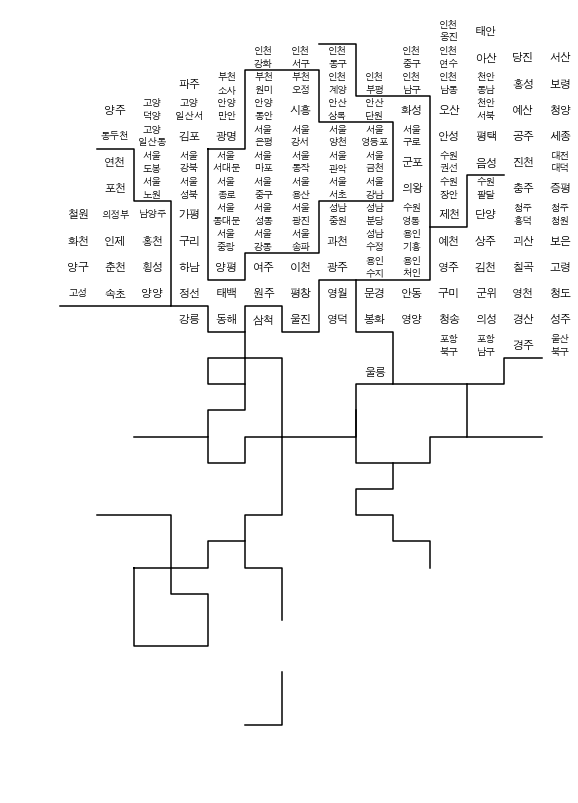

In [63]:
plt.figure(figsize=(8,11))


for indx, row_value in draw_korea.iterrows():
    if len(row_value['ID'].split()) == 2:
        dispname = "{}\n{}".format(row_value['ID'].split()[0],row_value['ID'].split()[1])
    elif row_value['ID'][:2] == '고성':
        dispname = '고성'
    else:
        dispname = row_value['ID']
    
    
    if len(row_value['ID'].splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
        

        
    plt.annotate(dispname, (row_value['x'] + 0.5, row_value['y'] + 0.5), weight = "bold", 
                 fontsize=fontsize, ha = 'center', va = 'center',linespacing = linespacing)

    
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs,ys, c = 'black', lw = 1.5)
        
        
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1)

plt.axis("off")
plt.tight_layout()  
plt.show() 
        

In [64]:
a = [(5, 1), (5,2), (7,2), (7,3), (11,3), (11,0)]
list(zip(*a))

[(5, 5, 7, 7, 11, 11), (1, 2, 2, 3, 3, 0)]

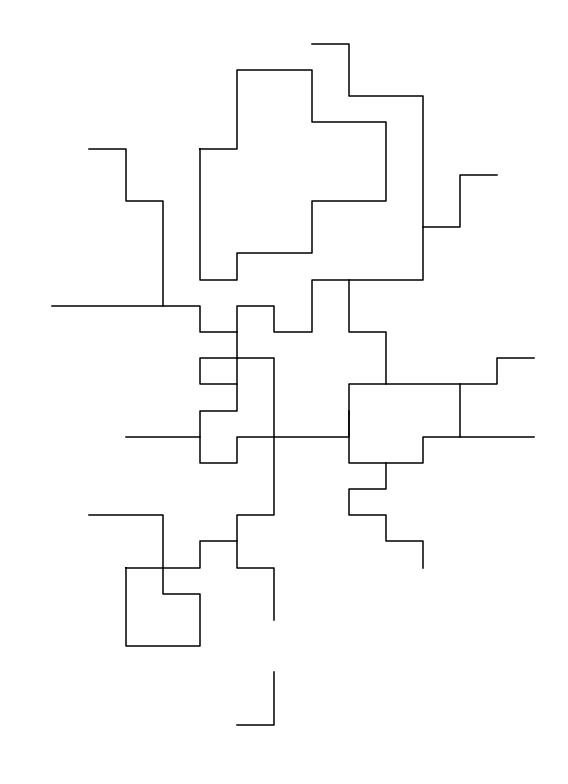

In [65]:
plt.figure(figsize=(8,11))
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs,ys, c = 'k', lw = 1.5)
    
plt.gca().invert_yaxis()
# plt.gca().set_aspect(1)

plt.axis("off")
plt.tight_layout()  

plt.show()

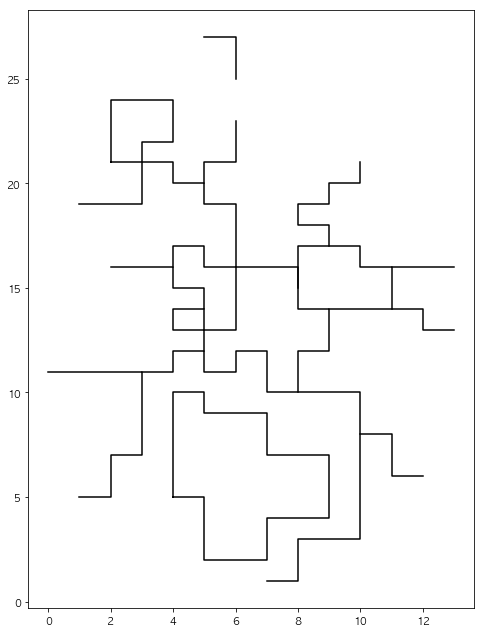

In [66]:
plt.figure(figsize=(8,11))
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs,ys, c = 'k', lw = 1.5)
plt.show()

In [67]:
draw_korea

,x,y,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
5,1,4,동두천
6,1,5,연천
7,1,6,포천
8,1,7,의정부
9,1,8,인제
